# 前言
提到神经网络就不得不提及人工智能。神经网络只是实现人工智能的一个算法。

我希望让大家体会到人工智能的神奇力量。让计算机像一样去思考，（这里要注意一点，现在所谓的人工智能都是让机器去做规则性、逻辑性很强的工作。只要涉及人类智能判断，人工智能就不是那么出色了。人工智能火的前提是大数据诞生，很多大数据处理技术，如并行计算、分布式存储等的成熟使得人工智能有了喷薄发展的前提。与其说是让机器去像人一样思考。不如说让人想机器一样思考。所以所现阶段的人工智能只是人工智能的低级阶段。人类所有的科技的发展都是一人为中心的，如雷达，“超级天眼”500米口径球面射电望远镜他们是眼睛的拓展，汽车、飞机、火箭对双腿的拓展。计算机对于智力思维的拓展。所以所人要继续发展科技首先一步是研究好自身，故人们将科技的发展分为内沿和外沿，即对自身的认知和对外太空的探索。相比之下对内在自我的探索则更为重要。一家之言，尽请笑纳。欢迎交流，讨论。）

应用：图形识辨，下象棋（AlphaGo，master），识别癌症细胞，语音识别，如小米，天猫的智能音响（家具物联网的核心。其实我也在思考一个问题，在人工智能领域是否存在，工业界领先学术界的说法，这个不敢打包票，但是已经有好多成熟的可以用于工业级开发的东西，投入市场了。如苹果公司的FaceID，人脸识别系统，神经网络引擎，还有某所谓国企推出的首款带神经网络单元芯片处理器。对于学术界老说最主要缺失的是数据，所以美国很多知名PhD纷纷投入企业，国内也不例外。因此说研究人工智能任重道远呀～）。
翻译、同声传译。

人工智能是一道美味的大餐，本次课程的目的是大家提供一些餐前清汤，水果的开胃菜。

# 1⃣️一层神经网络的实现

分类算法（两种）：
* 1.感知器
* 2.适应性的线性神经元
<img src='2-1.png' width='500'>
模拟人的神经元对信息的处理方法。根据升级学的研究神经元可以看成简单的带有二进制输出功能的逻辑电路门。
多种电信号从神经元交叉部分输入到神经元之中。
信号进入神经元的细胞核（图中绿色的圆圈），它将树突传进来的信号进行统一的运算。得到唯一的电信号会通过后面的部分，即轴突传递给后面的神经末梢。神经末梢会将传递的信号进行分解，然后依次传递给其他的神经元。

### 神经元的数学表示：
对人工神经元进行数学模拟，
$$
\begin{equation}
W =\left[ \begin{array}{c}
w_1 \\
...\\
w_m 
\end{array} 
\right ],
X =
\left[ \begin{array}{c}
x_1 \\
... \\
x_m 
\end{array}
\right ]
\end{equation}
$$
* W 系数，权重。模拟从分叉的管道传入的电信号，一般会对电信号做缩小的处理。即每个树突（管道）都会对神经元信号弱化。即每一个w表示每个管道对神经元信号的弱化。
* X 传入神经源的信号向量,
模拟细胞核对电信号进行统一的处理：X向量的点乘W向量 
$$ Z=W^T \centerdot X \qquad 即：Z=w_1x_1+...+w_mx_m  $$
对传进来的电性号做一个综合的处理。
处理完之后细胞不会把细胞核处理的电信号通过轴突直接传递出去，而是通过激活函数进一步处理。处理的方式就是如激活函数所描述。如果这个值小d等于于$\theta$则发出信号1，若大于$\theta$则发出信号-1.这样就相当于一个分类的行为,所有能让信号量发1的就是一类，其他又是一类。
### 激活函数
$$
\phi(z)=
\begin{cases}
1 & if \, z \geq \theta \\
-1 & \text{otherwise} 
\end{cases}
$$
激活函数(单元步调函数)：神经核将前面的所有输入电信号综合成Z之后，细胞核还会对综合后的电信号进行处理。

由上式可以看出神经网络的计算需要大量的矩阵的运算。故GPU更适合处理这些。

### 感知器分类算法步骤：
权重向量W  训练样本X
* 1.把权重向量初始化为0，或把每个分量初始化为[0,1]间任意小数
* 2.把训练样本输入感知器。【计算出Z值】得到分类结果（-1或1）【分类结果只能是两个值，即：1,1】
* 3.根据分类结果更新权重向量【即更新W的值】（调到第2步）

### 步调函数（激活函数)与阈值
$$ w_0 = - \theta  \quad and \quad x_0 = 1$$


$$
Z=w_1x_1+...+w_mx_m \quad and \quad
\phi(z)=
\begin{cases}
1 & if \, z \geq \theta \\
-1 & \text{otherwise} 
\end{cases}
$$
后面为了计算方便，我们把判断的阈值$\phi$记为$w_0$，把对应的电信号1记为$x_0$.给原来的式子多加了一个变量$w_0x_0$。即推到为
$$\Longrightarrow Z=w_0x_0+w_1x_1+...+w_mx_m \quad and \quad
\begin{cases}
1 & if \, z \geq 0 \\
-1 & \text{otherwise} 
\end{cases}$$

### 权重更新算法
* $w(j)=w(j)+\bigtriangledown w(j)$
* $\bigtriangledown w(j) = \eta \times (y-y^{,}) \times x(j)$
* $\eta 表示学习效率，，是一个[0,1]间的一个小数（模型的学习率，由模型使用者自己根据经验去设定）$
* y是输入样本的正确分类，y'是感知器计算出来的分类，x(j)相关的电信号。
如果输入样本的正确分类与感知器计算出来的分类是一样的即$y-y^{,}=0$则$\bigtriangledown w(j)=0$，从而权重分量不变,不用回对样本进行调整，只有感知器进行错误分类结果后才调整。

#### eg：样例：权重更新算法实例
w权重 x训练样本 假定训练样本正确分类为1但是感知器分类结果为-1
$W = [0,0,0], X=[1,2,3],n=0.3,y=1,y'=-1$

$\bigtriangledown W(0)=0.3*(1-(-1))*x(0)=0.3*2*1=0.6\quad \rightarrow \quad$
$w(0)=w(0)+\bigtriangledown W(0)=0.6$

$\bigtriangledown W(1)=0.3*(1-(-1))*x(1)=0.3*2*2=1.2\quad \rightarrow \quad$
$ w(1)=w(1)+\bigtriangledown W(1)=1.2 $

$\bigtriangledown W(2)=0.3*(1-(-1))*x(2)=0.3*2*3=1.8 \quad \rightarrow \quad$
$w(2)=w(2)+\bigtriangledown W(2)=1.8 $

$$\qquad \Longrightarrow \quad z更新后的权重向量 \quad w=[0.6,1.2,1.8]$$

### 阈值更新
一开始是根据经验自己设定的之后的阈值时要进行更新的，并不是一成不变的。

$\theta=w(0)=0 \qquad \bigtriangledown w(0)=\eta \times (y-y')\times x(0) \qquad x(0)=\phi(z)=1$

y=1  ， y'=-1

$w(0)=w(0)+ \bigtriangledown W(0)=0.3*(1-(-1))=0.6$

故，0.6为新的阈值

## 感知器算法的适合用范围。
<img src='2-2.png' width='600'>
对于感知器分类算法来说分类的数据必须是线性可分割的，只有独立分割开来才能找到分割线。而向后的两种数据的分布是非线性分割的，不太适用于感知器算法。

## 感知器算法的步骤总结
<img src='2-3.png' width='500'>
* 1.初始化向量w为0
* 2.将x向量输入感知器中
* 3.在Net input function（感知器）中做点积。
* 4.把得到的结果放入Activation function（步调函数，激活函数）中判断
* 5.如结果正确，则直接输出。如果结果错误，这返回来更新权重和阈值。
* 6.权重和阈值更新完之后，再次在感知器中进行分类，然后根据分类的结果进行相应的操作。
故此可看出数据越多权重根新的就越准确，所以整个机器模型是一个不断循环，不断迭代的过程。

## 感知器分类算法实现

In [19]:
import numpy as np
class Perceptron(object): #定义感知器类
    """
    eta:学习率
    n_iter:权重向量的训次数
    w_:神经分叉权重向量
    errors_:用于记录神经元判断错误次数，队列，根据错误次数来判断训练效果。
    """
    def __init__(self, eta = 0.011,n_iter=10):#定义初始化函数
        self.eta = eta;
        self.n_iter = n_iter
        pass
    
    """
    对分类进行预测，如果z大于0  电信号属于1
                 如果z小于0  电信号属于-1   
    """
    def predict(self,X):#对输入的向量进行分类
        return np.where(self.net_input(X) >=  0.0, 1, -1 )
        pass
    
    """ 
    向量点积。
    z = W0*1 + W1*X1 + ... +Wn*Xn
    """
    def net_input(self,X):
        return np.dot(X,self.w_[1:]+self.w_[0])
        pass
    
    def fit(self, X, y):
        """
        函数的目的：根据输入训练数据，培训神经元，
        X输入样本向量，y对应样本分类
        
        X:shape[n_samples,n_features]
        python中每一个数组都有一个shape属性，对向量性质的描述。
        n_samples：X的样本量
        n_features：神经元的分岔，向量的维数
        例如：X:[[1,2,3],[4,5,6]]
              n_samples：2
              n_features：3
              
              y:[1,-1]    即：向量[1,2,3]对应的正确分类为1
                              向量[4,5,6]对应的正确分类为-1
            
        """
        """
        第一步：初始化权重向量为0
        加1是因为前面算法提到的w0，也就是步调函数阈值
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
      
        for _ in range(self.n_iter):
            errors = 0
            """
            X:[[1,2,3],[4,5,6]]
            y:[1,-1]
            zip(X,y):[[1,2,3,1],[4,5,6,-1]]
            xi:1,2,3
            target:1
            """
            for xi, target in zip(X,y):
                """
                update = η * (y - y')
                predict:对输入的向量计算分类
                """
                update = self.eta * (target - self.predict(xi))
                """
                xi是一个向量
                update * xi 等价于：
                [▽w(1)=X[1]*upadte,▽w(2)=X[2]*upadte,▽w(3)=X[3]*upadte]
                
                w_[1:]:忽略w向量的第一个值
                """
                self.w_[1:] += update * xi
                #更新阈值
                self.w_[0] += update;
                
                errors += int(update != 0.0) #有错误就加一
                self.errors_.append(errors) #错误统计列表
                """
                通过统计次数判断错误的次数来分析分类的效果，只要错误次数越来越小则说明分类器的
                效果越来越好，这样有利于将来的判断。
                """
                pass
            pass

In [2]:
file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
import pandas as pd
df = pd.read_csv(file,header=None) 
#一般.csv文件的第一行为 数据头（数据的属性描述）header=None 第一行不是文件头
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### 数据可视化

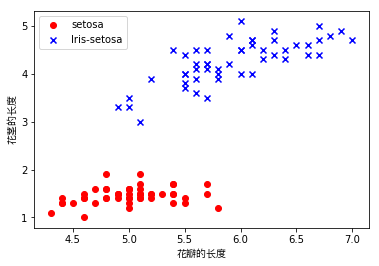

In [61]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#解决mac系统下的matplotlib中文乱码问题
myfont = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

y = df.loc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1) #如果y是Iris-setosa则转转化为-1，否则转化为1
#print y

#把数据中第0列和第2列数据提取出来。
X = df.loc[0:100,[0,2]].values
#print X  #X对应而为数组

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='Iris-setosa')
plt.xlabel(u'花瓣的长度',fontproperties=myfont)
plt.ylabel(u'花茎的长度',fontproperties=myfont)
plt.legend(loc='upper left')
plt.show()

从图中可以看出数据是具有线性划分的性质的，适合用感知器进行分类。
<img src='2-4.png' width='500'>
大致拟合成如图所示的线，这个分界线就可以用来分类，假如这个点在分界线的上方我们这它属于蓝色的一类，这个点在下方它属于红色点的分类。

## 训练
### 模型在训练过程中的展示
可以从中看出随着训练周期的增加错误率在逐渐减少。

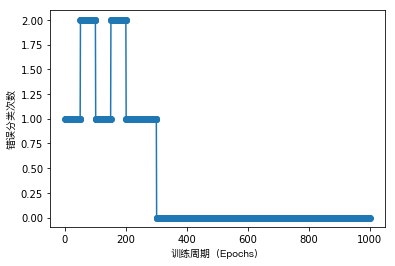

In [35]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_,marker='o')
plt.xlabel(u'训练周期（Epochs）',fontproperties=myfont)
plt.ylabel(u'错误分类次数',fontproperties=myfont)
plt.show()

## 预测
### 模型如何对数据进行分类，并进行可视化的展示
把预测的数据输入到神经网络中，得到模型的分类结果后，把分类结果以图形的方式进行展示。

In [59]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #给y中不同的元素 附上 不同的颜色 np.unique(y) = 2
    
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max()
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max()
    
    #print x1_min,x1_max
    #print x2_min,x2_max
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #将向量x1_min,x1_max,resolution扩展成二维数组。
    #print np.arange(x1_min,x1_max,resolution).shape
    #print np.arange(x1_min,x1_max,resolution)
    #每一个向量的差值都是一个resolution=0.02
    
    #print xx1.shape  #(225,185)
    #print xx1
    #扩展成225行，是根据np.arange(x2_min,x2_max,resolution) 得出
    #print np.arange(x2_min,x2_max,resolution).shape
    #print np.arange(x2_min,x2_max,resolution)
    
    #print xx2.shape #(225,185)
    #print xx2   
    
    #####################以上步骤都是在制造数据##########################
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #进行预测
    print xx1.ravel()
    print xx2.ravel()
    print np.array([xx1.ravel(),xx2.ravel()]).T #组合成二维数组。
    print Z
    #存储模型分类后的结果
    
    Z = Z.reshape(xx1.shape) #将Z转化为与xx1一样的数组。
    print Z
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)#根据数据绘制数据之间的分界线
    plt.xlim(xx1.min(),xx1.max())#x坐标的起始和末尾节点
    plt.ylim(xx2.min(),xx2.max())
    
    
    #给相应的节点打上相应的信息说明
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0],y = X[y==cl,1],alpha=0.8,c=cmap(idx),
                    marker = markers[idx], label=cl)
        

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.98  5.98  5.98]
[[ 3.3   0.  ]
 [ 3.32  0.  ]
 [ 3.34  0.  ]
 ..., 
 [ 6.94  5.98]
 [ 6.96  5.98]
 [ 6.98  5.98]]
[-1 -1 -1 ...,  1  1  1]
[[-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 ..., 
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]]


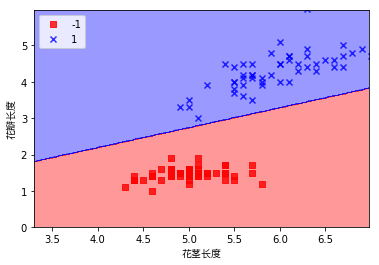

In [60]:
plot_decision_regions(X,y,ppn,resolution = 0.02)
plt.xlabel(u'花茎长度',fontproperties=myfont)
plt.ylabel(u'花瓣长度',fontproperties=myfont)
plt.legend(loc='upper left')
plt.show()

错误记录：VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 99 but corresponding boolean dimension is 100

应该是取向量xy长度不同引起的，讲师似乎同时用了loc和iloc，改成统一使用其中一个就好了。


# 2⃣️自适应的线形神经元
<img src='2-5.png' width='500'>
自适应线形神经元会把自己输出的结果与输入的结果进行比较。如果计算结果有错误，他会更加已给定的结果去动态的调整参数。

## 与感知器的区别
* 1.适应性线形神经元输入数据，计算结果，把计算的结果和正确结果进行计较，如果计算结果有错误，他会根据已给定的结果的差距去动态的调整参数。通过不断的修正这个参数使得输出的结果与实际结果的差距越来越小，从而使得预测结果越来越精确。
* 2.激活函数不同：感知器输入的是步调函数（即输入的结果大于阈值的时候输出1，小于阈值的时候输出0），适应性线形神经元是将输出数据与参数相乘后所得结果当成最终结果。即$z=w_1x_1+w_2x_2+...+w_mx_m$

### * 问题：自适应性的神经元是如何进行动态调整，去调整它的神经元参数的呢？
答：它使用了一种渐进下降的数值算法来不断缩短输出结果与实际结果的距离。
## 距离的定义
### 和方差公式（距离的定义）
$$ J(w) = \frac{1}{2} \sum_{i}(y^{(i)}-\phi(z^{(i)}))^2$$
* $y^{(i)}$ 实际的结果
* $\phi(z^{(i)})$ 神经网络计算的结果
$$ z = w_0x_0+w_1x_1+...+w_mx_m=w^Tx$$
* 激活函数 $\phi(z^{(i)}) = z $

神经元训练的目的：不断的去调整参数$w_0,w_1,...,w_m$,通过调整参数，使得z值不断的发生变化，然后，将z值带入上述距离公式，使得计算的结果$J(w)$变的越来越小。直到找到最优的结果。

### 渐进下降法
<img src='2-6.png' width='500'>
* 如图所示，和方差的函数是一条曲线。可以看出，在曲线的底部是存在最小值的，即$J_{min}(w)$。
* 由微积分理论的知识可以知道，对神经元参数w求偏导数，我们就可以在对应的点上，做出一条切线。如果这条曲线和下面的x轴即w形成的斜率是正的（也就是说这条线是向右上方的），当w值增大的时候，$J(w)$值也会增大，而当w值减小，$J(w)$值也会减小。当斜率是负，即这条线是向左上方的偏。

__总结：__
* 切线斜率为正的时候，我们减小w值，就会使得$J(w)$值也会减小。
* 切线斜率为负的时候，我们增大w值，就会使得$J(w)$值也会减小。

这样就得到一个调整算法：
根据给定的距离公式我们就对神经元参数求偏导数，求了偏导数之后就看看形成切线的斜率。如果斜率大于零，我们就减少该神经元的数值，如果斜率小于零，我们就增大该神经元的数值。

## 和方差求偏导数
\begin{align}
\frac{\partial J}{\partial w_j} & = \frac{\partial}{\partial w_j}\frac{1}{2}\sum_i(y^{(i)}-\phi(z^{(i)}))^2 \\
& = \frac{1}{2}\frac{\partial}{\partial w_j}\sum_i(y^{(i)}-\phi(z^{(i)}))^2\\
& = \frac{1}{2}\sum_i2(y^{(i)}-\phi(z^{(i)}))\frac{\partial}{\partial w_j} (y^{(i)}-\phi(z^{(i)}))\\
& =\sum_i(y^{(i)}-\phi(z^{(i
)}))\frac{\partial}{\partial w_j}(y^{(i)}-\sum_i(w_j^{(i)}x_j^{(i)}))\\
& =\sum_i2(y^{(i)}-\phi(z^{(i)}))(-x_j^{(i)})\\
& =-\sum_i2(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{align}
* 对于某个具体的参数$w_j$求偏导数。
* 第三步的时候已经求导
* 第四步的时候将$\phi(z^{(i)})=\sum_i(w_j^{(i)}x_j^{(i)})$
* 第五步，求的是参数$w_j$的导，所以$\frac{\partial}{\partial w_j}(y^{(i)}-\sum_i(w_j^{(i)}x_j^{(i)}) = -x_j^{(i)}$。
* 结果则用于目标函数$J(w)$的调值

## 神经元参数的更新
$$ \mathit{w:=w+\vartriangle w}$$
$$ \vartriangle w_j = -\eta \frac{\partial J}{\partial w_j} = \mu \sum_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$$
* 由前面可知，当斜率小于0的时候，增加神经元参数；当斜率大于0的时候，减少神经元参数，加少增加的值等于学习率$\eta$乘以切线的斜率（即走的步长），注意前面有一个负号（来平衡前面）。
* $-\eta = \mu$
* $\frac{\partial J}{\partial w_j} = \sum_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$

我们通过这样的方式，不断的调整每一个神经元的参数。这样整体和方差取得值向函数低端（最小值）滑动。我们通过迭代，让和方差的值不断缩小，这样就会得到最优解。

In [67]:
#权重更新方式不同。
class AdalineGD(object):
    """
    eta： float 学习效率，处于0和1
    n_iter: int 对训练数据进行学习改进学习改进次数
    w_: 一维向量  存储权重数值
    error_: 存储每次迭代改进时，网络对数据进行错误判断的次数
    """
    def __init__(self,eta=0.01,n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        pass
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def activation(self,X):
        return self.net_input(X)
    
    def predict(self,X):
        return np.where(self.activation(X) >= 0, 1, -1)
    def fit(self,X,y):
        """
        X:二维数组 [n_samples,n_features]
        n_samples 表示x中含有训练数据条目数
        n_features 含有4个数据的一维向量，用于表示一条训练条目
        y:一维向量  用于存储每一条训练条目对应的正确分类
        """
        self.w_ = np.zeros(1+X.shape[1]) #权重初始化为0
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X) #out = w0x0+w1x1+...+wmxm
            errors = (y-output) #错误次数
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() /2.0 #计算成本
            self.cost_.append(cost)
            pass
        return self
        pass

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.98  5.98  5.98]
[[ 3.3   0.  ]
 [ 3.32  0.  ]
 [ 3.34  0.  ]
 ..., 
 [ 6.94  5.98]
 [ 6.96  5.98]
 [ 6.98  5.98]]
[-1 -1 -1 ...,  1  1  1]
[[-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 [-1 -1 -1 ..., -1 -1 -1]
 ..., 
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]]


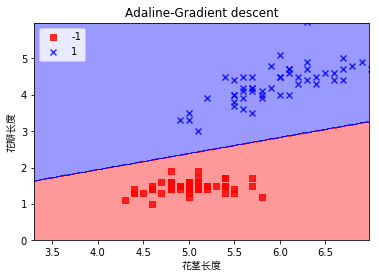

In [69]:
ada = AdalineGD(eta = 0.0001, n_iter=50)
ada.fit(X,y)
plot_decision_regions(X,y,classifier=ada)
plt.title('Adaline-Gradient descent')
plt.xlabel(u'花茎长度',fontproperties=myfont)
plt.ylabel(u'花瓣长度',fontproperties=myfont)
plt.legend(loc='upper left')
plt.show()

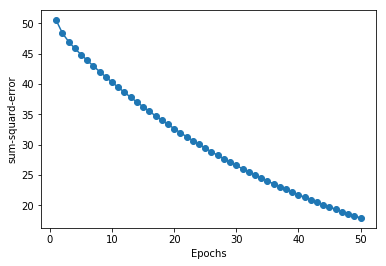

In [70]:
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squard-error')
plt.show()

# BP神经网络实现

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## 生产数据集
用scikit-learn产生数据

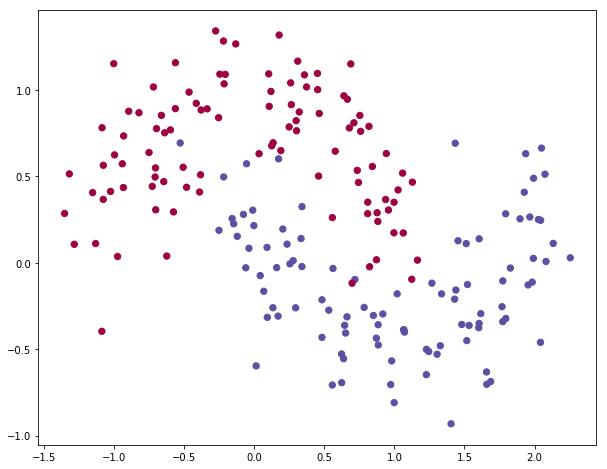

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

* 将红色的点和蓝色的点分开
* 值得注意的是，数据不是线性可分离的*，我们不能画出分隔两个类的直线。
* 线性分类器将无法适应数据，除非您手工处理那些对给定数据集工作得很好的非线性特性（如多项式）。
* 数据的形状：月亮形状
* 然而这缺失BP神经网络的优点，神经网络的隐含层将为你学习特征

In [9]:
# Helper function to plot a decision boundary.
# 辅助函数绘制决策边界。
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    # 设置最小最大值并填充
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    # 生产数据网络
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    # 预测整个数据网格上的数据
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    # 绘制数据点以及边界
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## 训练神经网络
* 现在让我们建立一个3层的神经网络，分别为输入层，隐层和输出层，各一层。
* 我们输入的数据是二维的所以输入层节点数为2。
* 输出层的节点数取决于我们分类的数量，2个即蓝色点，和红色点。用0表示红色，1表示蓝色。

如图所示：
<img src='./nn-3-layer-network.png' style='width: 50%'/>

#### 选择隐含层的维数
* 我们可以把更多的节点放入隐藏层，就能适应更复杂的函数。
* 但同样高维度是以成本为代价的，而且更容易发生过度拟合数据。
* 如何选择隐藏层的大小？
 * 虽然有一些一般性的指导方针和建议，但总是取决于你的具体问题，
 * 更像是一门艺术而不是一门科学。
 * 稍后我们将播放隐藏在后面的节点数，看看它如何影响我们的输出。

#### 为隐藏层选择激活函数
激活函数用于输入层到输出层的转变。非线性的激活函数则适用于非线性的预测。

常见的激活函数：
* tanh 双曲正切函数：
$$f(x)=tanch(x)$$
<img src='3-1.png' width='500'>
* sigmoid function：
$$f(x) = \frac{1}{1+\exp^{-x}} $$
<img src='3-2.png' width='500'>
* ReLUs 修正线性单元：
$$f(x)=max(0,x)$$

## softmax

In [3]:
num_examples = len(X) # 训练集的大小  training set size
nn_input_dim = 2 # 输入的维度  input layer dimensionality
nn_output_dim = 2 # 输出维度  output layer dimensionality

# Gradient descent parameters (I picked these by hand)
# 梯度下降参数
epsilon = 0.01 #学习率 learning rate for gradient descent
reg_lambda = 0.01 #正则化长度 regularization strength

In [4]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [5]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [6]:
# This function learns parameters for the neural network and returns the model.
#这个function是学习神经网络的参数以及建立模型

# - nn_hdim: Number of nodes in the hidden layer
# - nn_hdim:隐藏层的节点数

# - num_passes: Number of passes through the training data for gradient descent
# - num_passes:梯度下降法使用的样本数量

# - print_loss: If True, print the loss every 1000 iterations
# - print_loss:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    # 初始化
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    # 最后返回的模型，主要就是每一层的参数向量
    model = {}
    
    # Gradient descent. For each batch...
    # 梯度下降法
    for i in range(0, num_passes):

        # Forward propagation
        # 正向传播过程
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        # 误差反向传播过程
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization terms (b1 and b2 don't have regularization terms)
        # 添加(b1 and b2 不需要做正则化)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        # 梯度下降参数更新
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        # 更新模型参数
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068934
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


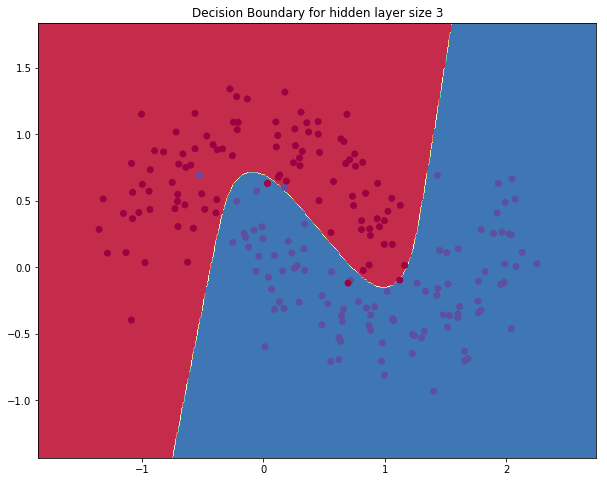

In [10]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

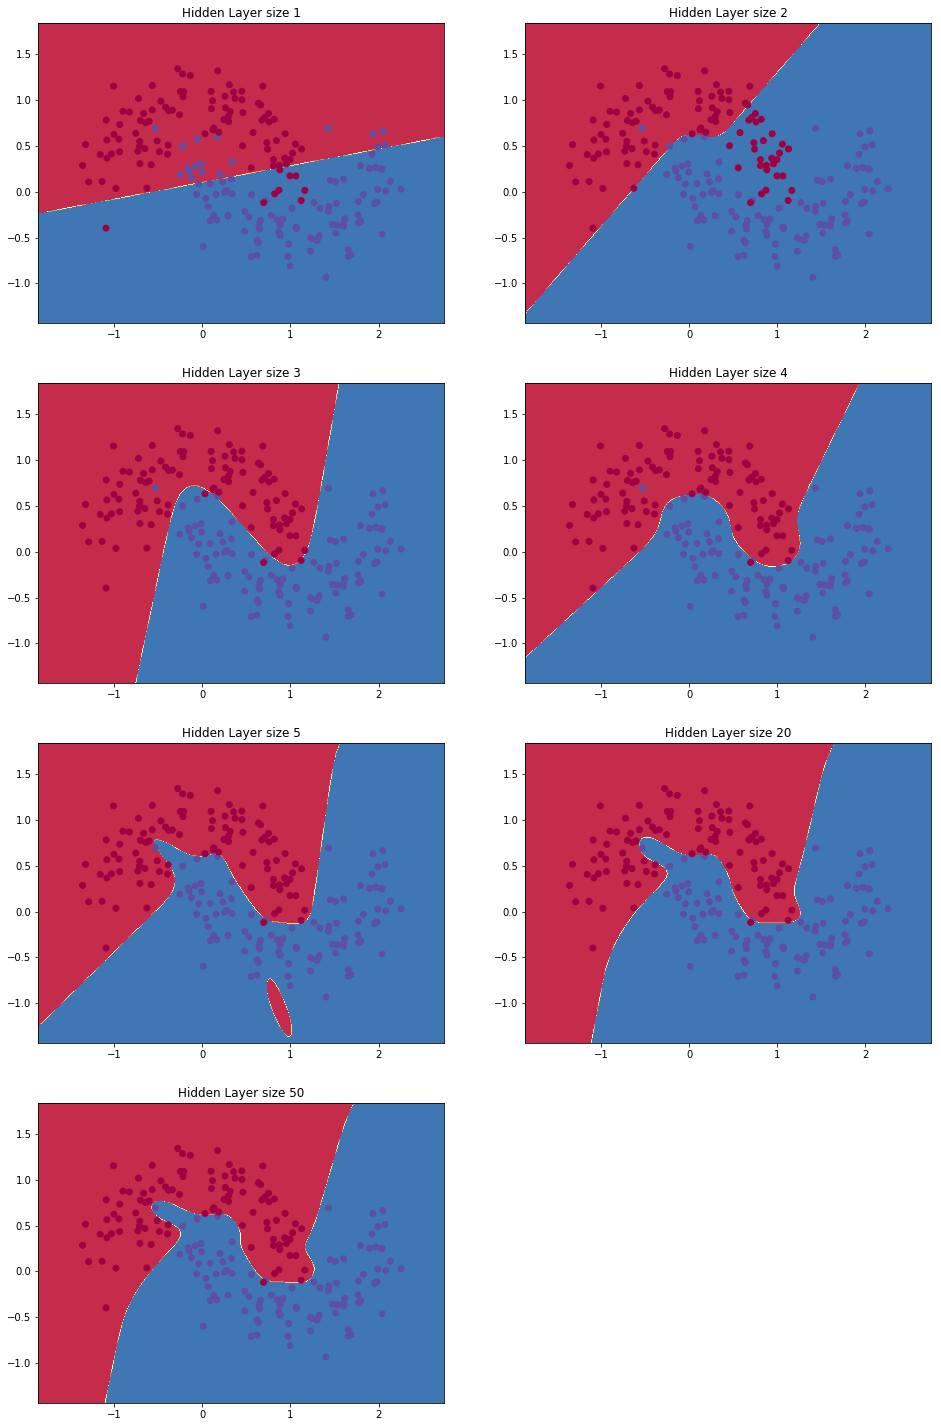

In [11]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()